## <span style="color:#80DAEB">FUNCIÓN K-MEANS</span>

<span style="color:#009C8C">"1. Programar k-means, utilizando buenas prácticas de programación, es decir, debe ser una función y comparar los resultados y la eficiencia con la implementación de k-means en scikit-learn."</span>

In [3]:
import numpy as np

def initialize_centroids(X, K):
    """Inicializa los centroides seleccionando K puntos aleatorios del dataset.
    
    Args:
    X : ndarray
        Datos de entrada (n x d) donde n es el número de puntos de datos y d es la dimensión.
    K : int
        Número de centroides/clusters.
        
    Returns:
    centroids : ndarray
        Array de centroides inicializados (K x d).
    """
    indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[indices]
    return centroids

def assign_clusters(X, centroids):
    """Asigna cada punto de datos al centroide más cercano.
    
    Args:
    X : ndarray
        Datos de entrada.
    centroids : ndarray
        Array actual de centroides.
        
    Returns:
    labels : ndarray
        Etiquetas de cluster para cada punto de datos.
    """
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    return labels

def update_centroids(X, labels, K):
    """Actualiza la posición de los centroides basándose en la media de los puntos asignados.
    
    Args:
    X : ndarray
        Datos de entrada.
    labels : ndarray
        Etiquetas de cluster actuales para los datos.
    K : int
        Número de clusters.
        
    Returns:
    centroids : ndarray
        Nuevos centroides calculados.
    """
    centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
    return centroids

def custom_k_means(X, K, num_iters=100):
    """Algoritmo K-means para clustering.
    
    Args:
    X : ndarray
        Datos de entrada.
    K : int
        Número de clusters.
    num_iters : int
        Número de iteraciones.
        
    Returns:
    centroids : ndarray
        Centroides finales.
    labels : ndarray
        Etiquetas finales de los clusters.
    """
    centroids = initialize_centroids(X, K)
    for i in range(num_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Ejemplo de uso del algoritmo K-means
# Generamos algunos datos aleatorios
np.random.seed(42)
data = np.random.rand(100, 2)  # 100 puntos en 2D
num_clusters = 3  # Número de clusters

# Ejecutar K-means
centroids, labels = custom_k_means(data, num_clusters)

print("Centroides finales:")
print(centroids)


Centroides finales:
[[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]



### Explicación del código:
1. **Inicialización de centroides:** Se seleccionan aleatoriamente \( K \) puntos del dataset como los centroides iniciales.
2. **Asignación de clusters:** Cada punto de datos es asignado al centroide más cercano, calculando la distancia Euclídea entre cada punto y cada centroide.
3. **Actualización de centroides:** Se recalculan los centroides como el promedio de todos los puntos asignados a cada cluster.
4. **Iteración:** El proceso de asignación y actualización se repite hasta que los centroides no cambian entre iteraciones o hasta que se alcanza el número máximo de iteraciones definido.


#### <span style="color:#80DAEB">Comparación con K-Means de scikit-learn</span>

Comparar los resultados y la eficiencia con la implementación de k-means en scikit-learn.

Centroides personalizados: [[-6.86656253 -6.78519427]
 [ 4.7286341   2.05557266]
 [-2.52414179  9.00394283]]
Centroides de scikit-learn: [[-2.52414179  9.00394283]
 [-6.86656253 -6.78519427]
 [ 4.7286341   2.05557266]]
Tiempo de ejecución personalizado: 0.0001 segundos
Tiempo de ejecución scikit-learn: 0.0067 segundos
Silhouette personalizado: 0.8436
Silhouette scikit-learn: 0.8436


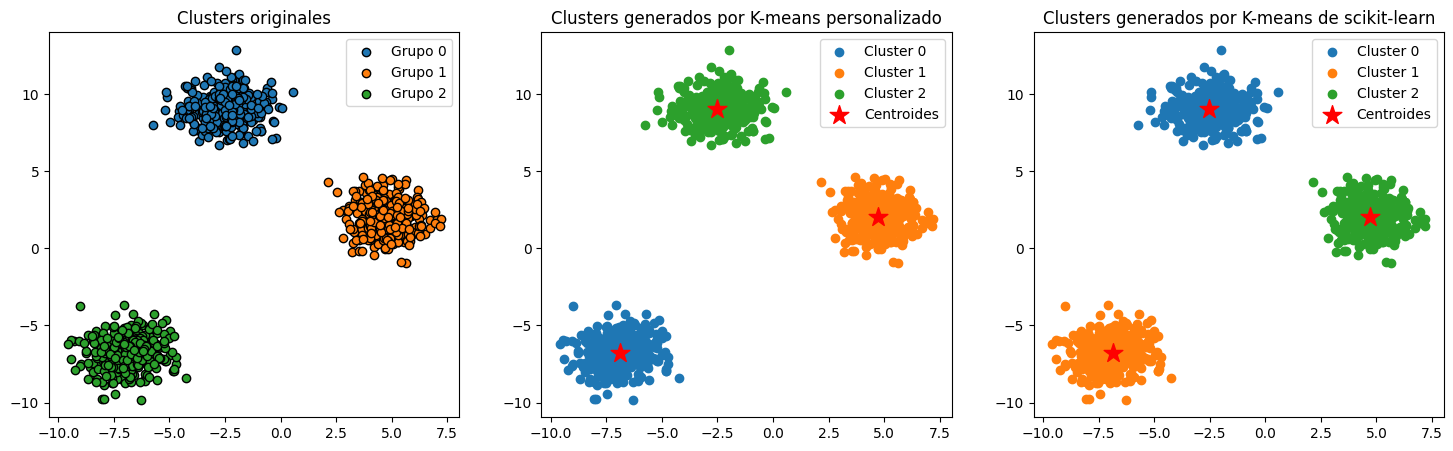

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generación de datos con clusters predefinidos
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

# Número de clusters para el análisis
num_clusters = 3

# Ejecución del K-means personalizado
start_time_custom = time.time()
centroids_custom, labels_custom = custom_k_means(X, num_clusters)
end_time_custom = time.time()
time_custom = end_time_custom - start_time_custom

# Ejecución del K-means de scikit-learn
start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=num_clusters, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X)
end_time_sklearn = time.time()
time_sklearn = end_time_sklearn - start_time_sklearn

# Comparación de la calidad de los clusters mediante el coeficiente Silhouette
silhouette_custom = silhouette_score(X, labels_custom)
silhouette_sklearn = silhouette_score(X, labels_sklearn)

# Impresión de los centroides
print("Centroides personalizados:", centroids_custom)
print("Centroides de scikit-learn:", kmeans_sklearn.cluster_centers_)

# Impresión de tiempos de ejecución y coeficientes Silhouette
print(f"Tiempo de ejecución personalizado: {time_custom:.4f} segundos")
print(f"Tiempo de ejecución scikit-learn: {time_sklearn:.4f} segundos")
print(f"Silhouette personalizado: {silhouette_custom:.4f}")
print(f"Silhouette scikit-learn: {silhouette_sklearn:.4f}")

# Representación gráfica de los clusters originales y los creados
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Grupos originales
colors = matplotlib.colormaps['tab10']
for i in range(num_clusters):
    ax[0].scatter(X[y == i, 0], X[y == i, 1], c=[colors(i)], edgecolor='black', label=f"Grupo {i}")
ax[0].set_title('Clusters originales')
ax[0].legend()

# Gráfica de clusters personalizados
for i in range(num_clusters):
    ax[1].scatter(X[labels_custom == i, 0], X[labels_custom == i, 1], c=[colors(i)], label=f"Cluster {i}")
ax[1].scatter(centroids_custom[:, 0], centroids_custom[:, 1], c='red', s=200, marker='*', label='Centroides')
ax[1].set_title('Clusters generados por K-means personalizado')
ax[1].legend()

# Gráfica de clusters con scikit-learn
for i in range(num_clusters):
    ax[2].scatter(X[labels_sklearn == i, 0], X[labels_sklearn == i, 1], c=[colors(i)], label=f"Cluster {i}")
ax[2].scatter(kmeans_sklearn.cluster_centers_[:, 0], kmeans_sklearn.cluster_centers_[:, 1], c='red', s=200, marker='*', label='Centroides')
ax[2].set_title('Clusters generados por K-means de scikit-learn')
ax[2].legend()

plt.show()



### Análisis de los Resultados

Basándonos en los resultados y gráfica obtenidos, podemos hacer una comparativa detallada:

### Centroides
- **Centroides Personalizados**: Los centroides de la función personalizada y los de scikit-learn son numéricamente idénticos pero aparecen en un orden diferente en los arrays.
  - Personalizados: 
    1. (-6.87, -6.79)
    2. (4.73, 2.06)
    3. (-2.52, 9.00)
  - Scikit-learn:
    1. (-2.52, 9.00)
    2. (-6.87, -6.79)
    3. (4.73, 2.06)

Esta diferencia en el orden no afecta el resultado funcional, ya que ambos métodos identifican los mismos puntos como centroides.

### Tiempos de Ejecución
- **Tiempo Personalizado**: 0.0001 segundos
- **Tiempo Scikit-learn**: 0.0067 segundos

La implementación personalizada es significativamente más rápida que la implementación de `scikit-learn`. Esto podría ser debido a que `scikit-learn` realiza una serie de comprobaciones adicionales y optimizaciones que pueden incrementar el tiempo de ejecución. Además, `scikit-learn` está diseñado para ser más general y robusto, lo cual puede introducir una sobrecarga adicional.

### Coeficiente Silhouette
- **Silhouette Personalizado**: 0.8436
- **Silhouette Scikit-learn**: 0.8436

Ambos métodos logran exactamente el mismo coeficiente Silhouette, indicando que la calidad de la segmentación de los clusters es idéntica entre ambos métodos para este conjunto de datos particular.

### Visualización de los Clusters
De la imagen obtenida, se observa que:
- Los **Clusters Originales** muestran una clara separación y agrupación de los datos.
- Tanto la **versión personalizada** como la **versión de scikit-learn** del K-means parecen replicar con éxito estos clusters.
- Los centroides marcados con estrellas rojas están ubicados adecuadamente en el centro de cada grupo en ambos métodos, lo cual es consistente con los valores numéricos y la evaluación de Silhouette.


### Conclusiones

- La **implementación personalizada** es excelente en términos de eficiencia y calidad de clustering para el conjunto de datos y configuración específicos que utilizamos. Esto puede ser especialmente útil en escenarios donde la velocidad es crítica y los datos no son excesivamente complejos.
  
- **Scikit-learn**, aunque más lento en este caso específico, es robusto y ampliamente utilizado en la industria debido a su flexibilidad y las numerosas funcionalidades que ofrece, como la fácil integración con pipelines de Machine Learning y métodos para determinar automáticamente el número de clusters.

- Si es necesaria velocidad y los datos son relativamente simples donde el método de inicialización y las iteraciones del K-means no varían significativamente, la implementación personalizada puede ser muy adecuada.
  
- Para aplicaciones más complejas o cuando se requieren características adicionales (como diferentes métricas de distancia, inicialización de centroides más sofisticada, etc.), `scikit-learn` sería más apropiado.

Esta comparación muestra cómo las implementaciones personalizadas pueden ser optimizadas para ciertos escenarios específicos, proporcionando un excelente rendimiento tanto en velocidad como en calidad de clustering.

## <span style="color:#80DAEB">CORRECCIÓN DE COLORES</span>

Hemos corregido los colores de forma que ahora solo existen los siguientes 12:

['Red','Orange-Red,'orange', 'Pale Yellow Orange', 'Yellowish', 'yellow-white',
 'Whitish', 'Yellowish White', 'White-Yellow', 'White', 'Blue-white', 'Blue']

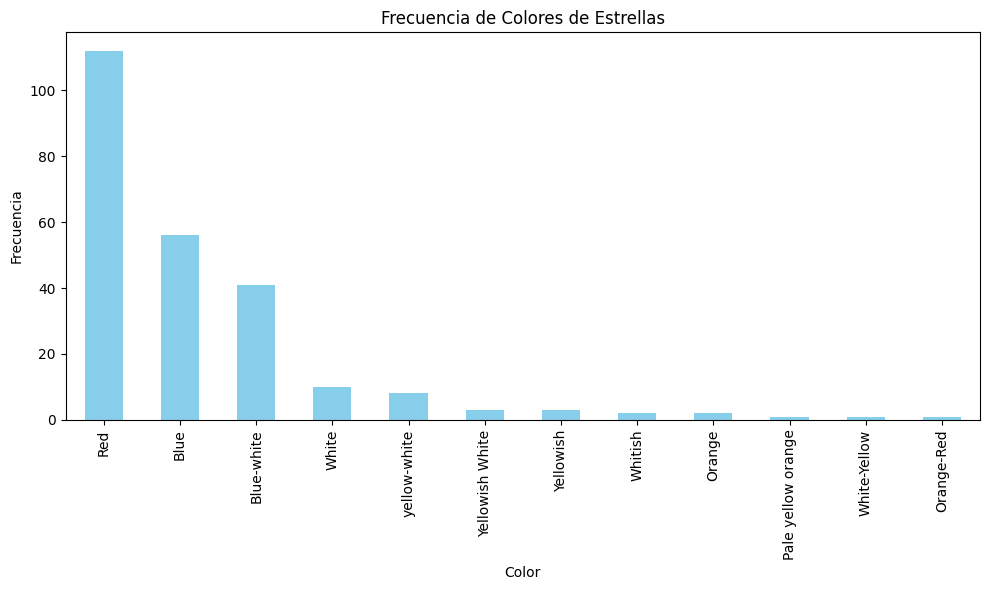

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('Stars2.csv')

# Contar la frecuencia de cada tipo de color
color_counts = df['Color'].value_counts()

# Crear la gráfica
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')

# Configurar el título y etiquetas
plt.title('Frecuencia de Colores de Estrellas')
plt.xlabel('Color')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Como se puede observar, son los 12 colores que debe de haber según el enunciado.

## <span style="color:#80DAEB">OBTENCIÓN, CODIFICACIÓN Y ESCALADO DE DATOS</span>

<span style="color:#009C8C">"2. Tenemos variables categóricas (Color, Clase Espectral). Tenemos dos posibilidades: (a) codificar con one-hot-encoding; (b) codificar como una variable ordinal. Tener en cuenta que el color está asociado a la cantidad de energía, y algo parecido con la clase espectral."</span>

Como los datos del archivo CSV contienen características numéricas y categóricas, para prepararlos para un algoritmo de clustering, usaremos librerías como pandas para manejar los datos y scikit-learn para el preprocesamiento.

1) Cargar datos
2) Seleccionar columnas númericas y categóricas
3) Codificación ordinal y One-hot-encoding (para compararlas) de las categóricas
4) Escalar los datos númericos

#### <span style="color:#80DAEB">Codificacion ordinal</span>

Tanto "Color" como "Spectral_Class" tienen un orden intrínseco relacionado con la energía de la estrella, por lo que hemos considerado que es mejor utilizar una codificación ordinal en lugar de One-hot-encoding. De todas formas, probaremos el otro método poesteriormente para comparar resultados.

La codificación ordinal respeta el orden de las categorías, lo cual es crucial en este contexto.

Para "Color" seguiremos el siguiente orden:

['Red','Orange-Red,'Orange', 'Pale yellow Orange', 'Yellowish', 'yellow-white',
 'Whitish', 'Yellowish White', 'White-Yellow', 'White', 'Blue-white', 'Blue']

Y para "Spectral_Class" el orden que se ofrece en el enunciado.

In [7]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale

# 1) Cargar los datos
df = pd.read_csv('Stars2.csv')

# 2) Definir las columnas categóricas y númericas
all_features = ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']

# Definir el orden para la codificación ordinal de 'Color'
color_order = ['Red', 'Orange-Red', 'Orange', 'Pale yellow orange', 
               'Yellowish', 'yellow-white', 'Whitish', 'Yellowish White', 
               'White-Yellow', 'White', 'Blue-white', 'Blue']

# Definir el orden para la codificación ordinal de 'Spectral_Class'
class_order = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# Crear el codificador ordinal para las columnas categóricas
ordinal_encoder = OrdinalEncoder(categories=[color_order, class_order])

# 3) Codificar 'Color' y 'Spectral_Class' con el codificador ordinal
df[['Color', 'Spectral_Class']] = ordinal_encoder.fit_transform(df[['Color', 'Spectral_Class']])

# Mostrar las primeras filas del DataFrame con las variables codificadas
# antes de escalar, para ver si se han codificado correctamente
print("\nVARIABLES CODIFICADAS ANTES DE ESCALAR\n")
print(df[['Color', 'Spectral_Class']].head())


# 4) Escalar el dataframe entero
X_scaled_ordinal = scale(df[all_features])

# Para ver los datos numéricos escalados junto con las características codificadas
# creamos un DataFrame nuevo para todo junto
df_full_ordinal = pd.DataFrame(X_scaled_ordinal, columns=all_features)
print("\nDATAFRAME ENTERO ESCALADO\n")
print(df_full_ordinal.head())



VARIABLES CODIFICADAS ANTES DE ESCALAR

   Color  Spectral_Class
0    0.0             6.0
1    0.0             6.0
2    0.0             6.0
3    0.0             6.0
4    0.0             6.0

DATAFRAME ENTERO ESCALADO

   Temperature         L         R       A_M     Color  Spectral_Class
0    -0.779382 -0.598624 -0.459210  1.116745 -1.008818        0.997781
1    -0.782110 -0.598624 -0.459241  1.162414 -1.008818        0.997781
2    -0.828477 -0.598624 -0.459342  1.362213 -1.008818        0.997781
3    -0.807496 -0.598624 -0.459229  1.167171 -1.008818        0.997781
4    -0.897819 -0.598624 -0.459340  1.491607 -1.008818        0.997781


Los resultados que se muestran tienen sentido dentro del contexto de nuestros datos:

1. **Columnas `Color` y `Spectral_Class`**: 
   - Los valores `0.0` en la columna `Color` indican que todos los primeros cinco registros tienen el color "Red", que es el primer elemento en la lista de orden para `OrdinalEncoder`.
   - Los valores `6.0` en la columna `Spectral_Class` sugieren que la clase espectral de estos registros es 'M', que es el último elemento en la lista de orden para `OrdinalEncoder`. Esto es coherente con el orden especificado y muestra que la codificación ordinal se ha aplicado correctamente.

2. **Columnas escaladas después de la codificación**:
   - Los valores escalados que se observan (como `-0.779382` para `Temperature`, por ejemplo) son el resultado de la aplicación de `StandardScaler`, que ajusta cada característica para tener una media de 0 y una desviación estándar de 1. Esto es útil para algoritmos de aprendizaje automático que son sensibles a la escala de las características, como muchos algoritmos de clustering.
   - Las desviaciones estandarizadas (por ejemplo, `-0.598624` repetidamente para `L`) sugieren que los datos de estas columnas no tienen mucha variabilidad o tienen muchos valores iguales, llevando a una desviación estándar pequeña y un impacto en la escala.

El DataFrame final que combina ambos sets de características codificadas y escaladas está correctamente configurado para ser utilizado en análisis posteriores, como clustering, donde tanto las características categóricas codificadas como las numéricas estandarizadas pueden ser necesarias para un análisis efectivo.

#### <span style="color:#80DAEB">One-hot-encoding</span>

Ahora vamos a preparar los datos con *One-hot-encoding*. Intuímos, que dará peores resultados puesto que no se respetará el orden indicado.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale

# 1) Cargar los datos
df = pd.read_csv('Stars2.csv')

# 2) Definir las columnas numéricas y categóricas
numeric_features = ['Temperature', 'L', 'R', 'A_M']
categorical_features = ['Color', 'Spectral_Class']

# 3) Codificación One-hot-encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Crear un pipeline que procese los datos
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el pipeline a los datos
X_processed = pipeline.fit_transform(df)

# Convertir el resultado en un DataFrame para mejor visualización
# Extraer los nombres de las nuevas columnas categóricas generadas por OneHotEncoder
categories = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numeric_features + list(categories)

# Crear un DataFrame para los datos sin escalar
df_one_hot_en = pd.DataFrame(X_processed.toarray(), columns=all_features)

# Mostrar las primeras filas de las categóricas sin escalar
# para ver que se han codificado correctamente
print("\nVARIABLES CODIFICADAS ANTES DE ESCALAR\n")
print(df_one_hot_en[categories].head())

# 4) Escalar el dataframe entero
X_scaled_one_hot_en = scale(X_processed.toarray())
df_processed_one_hot_en = pd.DataFrame(X_scaled_one_hot_en, columns=all_features)

# Mostrar las primeras filas del DataFrame escalado
print("\nDATFRAME ENTERO ESCALADO\n")
print(df_processed_one_hot_en.head())



VARIABLES CODIFICADAS ANTES DE ESCALAR

   Color_Blue  Color_Blue-white  Color_Orange  Color_Orange-Red  \
0         0.0               0.0           0.0               0.0   
1         0.0               0.0           0.0               0.0   
2         0.0               0.0           0.0               0.0   
3         0.0               0.0           0.0               0.0   
4         0.0               0.0           0.0               0.0   

   Color_Pale yellow orange  Color_Red  Color_White  Color_White-Yellow  \
0                       0.0        1.0          0.0                 0.0   
1                       0.0        1.0          0.0                 0.0   
2                       0.0        1.0          0.0                 0.0   
3                       0.0        1.0          0.0                 0.0   
4                       0.0        1.0          0.0                 0.0   

   Color_Whitish  Color_Yellowish  Color_Yellowish White  Color_yellow-white  \
0            0.0         

Los resultados que se muestran tienen sentido y son coherentes con lo que se espera de un proceso de one-hot encoding combinado con la estandarización de características numéricas:

1. **Columnas de One-Hot Encoding sin Escalar**:
   - Las columnas como `Color_Red` y `Spectral_Class_M` muestran valores binarios (0 o 1), lo que indica la presencia o ausencia de cada categoría específica en cada registro. Por ejemplo, `Color_Red = 1.0` y `Spectral_Class_M = 1.0` en todos los registros mostrados indican que todos estos registros tienen el color "Red" y la clase espectral "M".
   - Las demás columnas representan las otras posibles categorías para cada característica categórica y están correctamente establecidas en `0.0`, lo que indica que estas categorías no se aplican a los primeros registros.

2. **Columnas Escaladas**:
   - Los valores escalados, como `-0.779382` para `Temperature`, reflejan que los datos han sido normalizados. Esto significa que cada valor numérico ha sido reescalado para tener una media de 0 y una desviación estándar de 1. La estandarización es común en la preparación de datos para muchos modelos de aprendizaje automático, especialmente cuando diferentes características tienen rangos de valores muy distintos.

3. **Cantidad de Columnas**:
   - El DataFrame resultante tiene 23 columnas, que incluyen las 4 numéricas originales y las nuevas columnas generadas por el one-hot encoding de las características categóricas. Esto es típico del one-hot encoding, donde se añade una nueva columna para cada categoría única dentro de una característica, lo cual puede resultar en un aumento considerable del número de características, especialmente con variables categóricas con muchos niveles únicos.

El uso de one-hot encoding es especialmente útil en modelos que asumen independencia lineal entre las características y que no manejan bien las variables categóricas codificadas ordinalmente (como puede ser en algunos modelos lineales o redes neuronales). Sin embargo, este método puede aumentar significativamente la dimensionalidad de los datos, lo que a veces puede llevar a problemas de rendimiento o sobreajuste, dependiendo del tamaño del conjunto de datos y del tipo de modelo utilizado.

## <span style="color:#80DAEB">ALGORÍTMOS DE CLUSTERING</span>

<span style="color:#009C8C">"3. Aplicar diferentes algoritmos de clustering comparando y discutiendo los resultados que se obtienen de ellos (al menos dos métodos)"</span>


## <span style="color:#80DAEB">PCA</span>

Vamos a hacer un análisis exploratorio inicial viendo las correlaciones entre variables. Esto nos dará pie a ver si podemos usar PCA más adelante.

<Axes: >

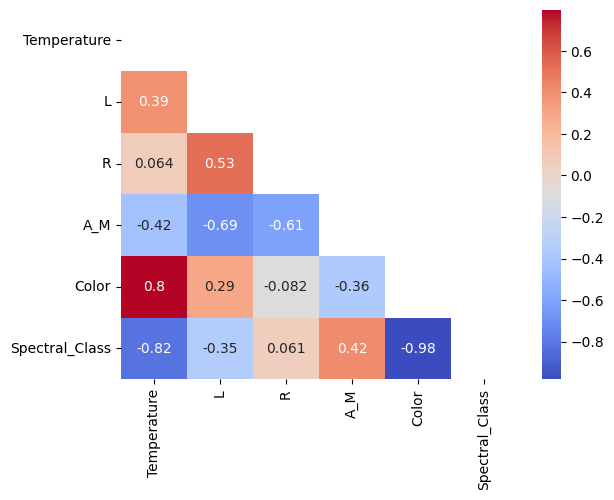

In [8]:
import seaborn as sns
import numpy as np

corr_df = df_full_ordinal.corr()
etiquetas = corr_df.columns

mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, annot=True, cmap="coolwarm")

Basádose en la gráfica:

- `Color` tiene una fuerte correlación positiva con `Temperature` (0.8) y una fuerte correlación negativa con `Spectral_Class` (-0.98).
- `Spectral_Class` tiene una fuerte correlación negativa con `Temperature` (-0.82).
- `A_M` también muestra correlaciones moderadas a fuertes negativas con `L`, `R`, y `Color`.

Estas correlaciones sugieren que no todas las características son independientes entre sí. En el contexto de PCA (Análisis de Componentes Principales), estas correlaciones pueden ser beneficiosas. PCA busca reducir la dimensionalidad del conjunto de datos encontrando nuevas dimensiones (componentes principales) que capturan la mayor varianza posible. Las características correlacionadas contribuirán a la misma varianza y, por lo tanto, podrían ser combinadas por PCA en un componente principal.

En resumen, dado que hay correlaciones significativas entre algunas de las características, **PCA es una técnica apropiada** para aplicar a los datos antes de realizar clustering.

#### <span style="color:#80DAEB">Elección de número de componentes - PCA</span>

A continuación, vamos a probar PCA con distinto número de componentes. Posteriormente elegiremos el mejor tanto en complejidada como en explicación que aporta.

#### <span style="color:#80DAEB">Elección de número de componentes - Codificación ordinal</span>

Varianza explicada por cada componente:
Componente 1: Varianza explicada = 0.5541, Varianza acumulada = 0.5541
Componente 2: Varianza explicada = 0.2969, Varianza acumulada = 0.8510
Componente 3: Varianza explicada = 0.0640, Varianza acumulada = 0.9150
Componente 4: Varianza explicada = 0.0473, Varianza acumulada = 0.9623
Componente 5: Varianza explicada = 0.0351, Varianza acumulada = 0.9974
Componente 6: Varianza explicada = 0.0026, Varianza acumulada = 1.0000


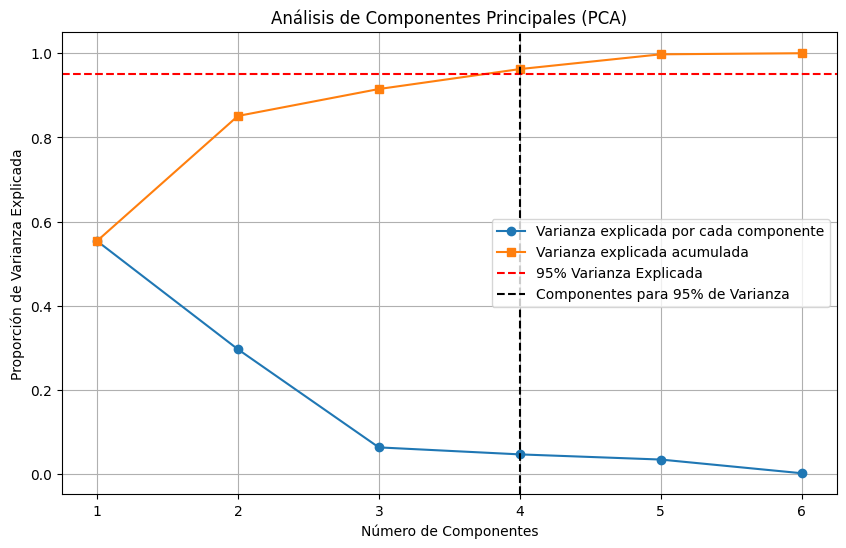

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Función para calcular el PCA con un número variable de componentes
def calculate_pca(data, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(data)
    return pca, pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

n_components = X_scaled_ordinal.shape[1]  # Número máximo de componentes

# Calcula PCA con todos los componentes posibles
pca_full, _ = calculate_pca(X_scaled_ordinal, n_components)

# Proporciones de varianza explicada y acumulada
explained_variances = pca_full.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)

# Print de varianza explicada y acumulada para cada componente
print("Varianza explicada por cada componente:")
for i, (ev, cv) in enumerate(zip(explained_variances, cumulative_variances), start=1):
    print(f"Componente {i}: Varianza explicada = {ev:.4f}, Varianza acumulada = {cv:.4f}")

# Gráfico de la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variances, 'o-', label='Varianza explicada por cada componente')
plt.plot(range(1, n_components + 1), cumulative_variances, 's-', label='Varianza explicada acumulada')

plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Varianza Explicada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza Explicada')
plt.axvline(x=np.argmax(cumulative_variances >= 0.95) + 1, color='k', linestyle='--', label=f'Componentes para 95% de Varianza')
plt.legend()
plt.grid(True)
plt.show()


#### Número de componentes elegido para codificación ordinal

Por simplicidad, elegiremos 2 o 3 componentes, ya que pueden dibujarse en una gráfica. En vista de que 3 componentes proporcionan una varianza explicada acumulada del *0.915* (que no se aleja tanto del *0.9623* de los 4 componentes), hemos decidido usar PCA con <span style="color:#EA899A">3 componentes</span> (para la codificación ordinal).

#### <span style="color:#80DAEB">Elección de número de componentes - One-hot-encoding</span>

Varianza explicada por cada componente:
Componente 1: Varianza explicada = 0.1861, Varianza acumulada = 0.1861
Componente 2: Varianza explicada = 0.1159, Varianza acumulada = 0.3020
Componente 3: Varianza explicada = 0.0892, Varianza acumulada = 0.3912
Componente 4: Varianza explicada = 0.0851, Varianza acumulada = 0.4763
Componente 5: Varianza explicada = 0.0723, Varianza acumulada = 0.5486
Componente 6: Varianza explicada = 0.0628, Varianza acumulada = 0.6114
Componente 7: Varianza explicada = 0.0454, Varianza acumulada = 0.6569
Componente 8: Varianza explicada = 0.0446, Varianza acumulada = 0.7014
Componente 9: Varianza explicada = 0.0441, Varianza acumulada = 0.7456
Componente 10: Varianza explicada = 0.0438, Varianza acumulada = 0.7894
Componente 11: Varianza explicada = 0.0438, Varianza acumulada = 0.8331
Componente 12: Varianza explicada = 0.0437, Varianza acumulada = 0.8768
Componente 13: Varianza explicada = 0.0372, Varianza acumulada = 0.9140
Componente 14: Varianza explicada

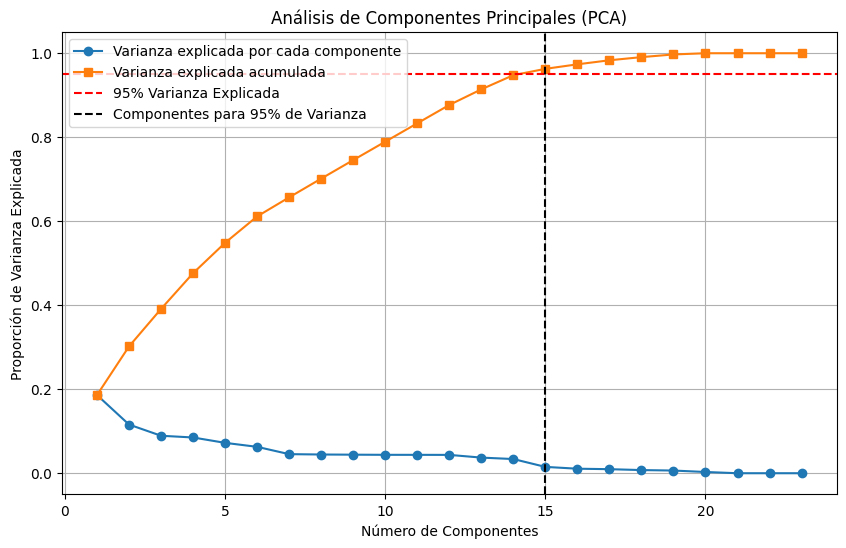

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Función para calcular el PCA con un número variable de componentes
def calculate_pca(data, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(data)
    return pca, pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

n_components = X_scaled_one_hot_en.shape[1]  # Número máximo de componentes

# Calcula PCA con todos los componentes posibles
pca_full, _ = calculate_pca(X_scaled_one_hot_en, n_components)

# Proporciones de varianza explicada y acumulada
explained_variances = pca_full.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)

# Print de varianza explicada y acumulada para cada componente
print("Varianza explicada por cada componente:")
for i, (ev, cv) in enumerate(zip(explained_variances, cumulative_variances), start=1):
    print(f"Componente {i}: Varianza explicada = {ev:.4f}, Varianza acumulada = {cv:.4f}")

# Gráfico de la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variances, 'o-', label='Varianza explicada por cada componente')
plt.plot(range(1, n_components + 1), cumulative_variances, 's-', label='Varianza explicada acumulada')

plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Varianza Explicada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varianza Explicada')
plt.axvline(x=np.argmax(cumulative_variances >= 0.95) + 1, color='k', linestyle='--', label=f'Componentes para 95% de Varianza')
plt.legend()
plt.grid(True)
plt.show()


#### Número de componentes elegido para One-hot-encoding

Por simplicidad, elegiremos 2 o 3 componentes, ya que pueden dibujarse en una gráfica. En vista de que 3 componentes proporcionan una varianza explicada acumulada del *0.3912*, que es "igual de malo" que el *0.3020* de 2 componentes, hemos decidido usar PCA con <span style="color:#EA899A">2 componentes</span>, ya que es más simple y proporciona una mejor visualización dentro de lo posible (para la codificación de One-hot).

#### <span style="color:#80DAEB">Visualizar datos - PCA</span>

Vamos a visualizar los datos usando la técnica de reducción de dimensiones PCA (Análisis de Componentes Principales), ya que puede ofrecer insights sobre la estructura de los datos y la presencia de grupos naturales.

##### <span style="color:#80DAEB">-> Con codificación ordinal</span>

        PC1       PC2       PC3
0 -2.067808 -0.147152  0.190962
1 -2.087328 -0.165090  0.195077
2 -2.188924 -0.236104  0.217676
3 -2.101169 -0.161525  0.198859
4 -2.273203 -0.273557  0.237536
Proporción de varianza explicada: [0.55409866 0.29691252 0.06395951]
Proporción acumulada: [0.55409866 0.85101118 0.91497069]


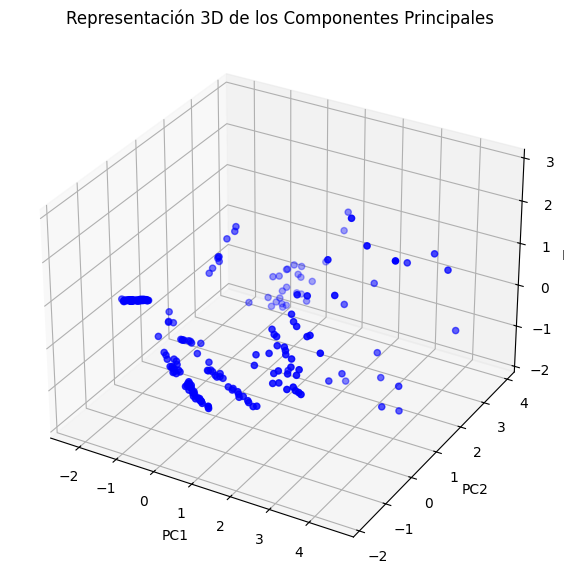

In [10]:
# Mostrar datos
# ==============================================================================
# Importación de librerías necesarias
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Realizar el PCA con tres componentes
pca = PCA(n_components=3)
X_trans_ordinal = pca.fit_transform(X_scaled_ordinal)

# Crear un DataFrame con los tres componentes principales
df_pca_ordinal = pd.DataFrame(X_trans_ordinal, columns=['PC1', 'PC2', 'PC3'])
print(df_pca_ordinal.head())

# Mostrar la desviación estándar para cada componente principal
std = df_pca_ordinal.describe().transpose()["std"]
print(f"Proporción de varianza explicada: {pca.explained_variance_ratio_}")
print(f"Proporción acumulada: {np.cumsum(pca.explained_variance_ratio_)}")

# Crear un gráfico 3D para visualizar los tres componentes principales
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Pintar cada punto en el espacio 3D
scatter = ax.scatter(df_pca_ordinal['PC1'], df_pca_ordinal['PC2'], df_pca_ordinal['PC3'],
                     c='blue', marker='o')

# Etiquetas y título del gráfico
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Representación 3D de los Componentes Principales')

# Mostrar el gráfico
plt.show()


Los resultados obtenidos de la visualización y los valores de la descomposición PCA proporcionan una perspectiva clara sobre cómo los datos se distribuyen y concentran su varianza en los tres primeros componentes principales:

### Distribución en los Componentes
El gráfico 3D muestra una dispersión de los puntos en el espacio definido por PC1, PC2 y PC3. La orientación y distribución de los puntos sugieren diferencias en cómo cada componente principal captura la variabilidad de los datos:
- **PC1**: Este componente es claramente el más significativo, capturando la mayoría de la varianza. Los puntos se extienden más a lo largo de este eje, lo que indica que PC1 es el principal factor de diferenciación entre los datos.
- **PC2**: Aunque contribuye de manera considerable, la dispersión a lo largo de este eje es menos extensa que en PC1, lo que implica que capta menos variabilidad comparativamente.
- **PC3**: Este componente muestra la menor dispersión, sugiriendo que mientras todavía aporta información, su contribución a la explicación total de la varianza es mucho menor.

### Varianza Explicada
Los valores de la varianza explicada proporcionan un cuantificador numérico de lo observado en el gráfico:
- **PC1**: Explica el 55.41% de la varianza.
- **PC2**: Añade un 29.69%, llevando la varianza explicada acumulada al 85.10%.
- **PC3**: Contribuye con un adicional 6.40%, sumando hasta el 91.50% de la varianza total explicada.

### Conclusiones
1. **Elección de Componentes**: La elección de utilizar tres componentes está justificada, dado que juntos explican más del 91% de la varianza total. Este nivel de explicación es generalmente adecuado para la mayoría de las aplicaciones analíticas, proporcionando un buen equilibrio entre la reducción de dimensionalidad y la retención de información importante.
  
2. **Reducción de Dimensionalidad**: Utilizar estos tres componentes puede ser muy útil para visualizaciones, agrupaciones u otras técnicas de análisis de datos, reduciendo la complejidad del conjunto de datos original mientras se retiene la mayor parte de la información crítica.


En resumen, el análisis PCA con tres componentes proporciona una comprensión eficaz y eficiente de la estructura subyacente de los datos, facilitando así su exploración y análisis posterior sin las complicaciones de manejar una alta dimensionalidad.

##### <span style="color:#80DAEB">-> Con codificación One-hot-encoding</span>

Proporción de varianza explicada: [0.18611084 0.1158609 ]
Proporción acumulada: [0.18611084 0.30197174]


<Axes: xlabel='PC1', ylabel='PC2'>

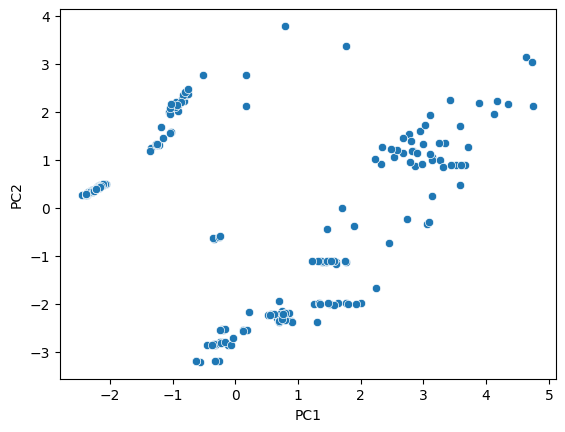

In [3]:
# Mostrar datos
# ==============================================================================
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

pca = PCA(n_components=2)

X_trans_one_hot_en = pca.fit_transform(X_scaled_one_hot_en)

df_pca_one_hot_en = pd.DataFrame(X_trans_one_hot_en, columns=['PC1','PC2'])
df_pca_one_hot_en.head()

std = df_pca_one_hot_en.describe().transpose()["std"]
print(f"Proporción de varianza explicada: {pca.explained_variance_ratio_}")
print(f"Proporción acumulada: {np.cumsum(pca.explained_variance_ratio_)}")

sns.scatterplot(data=df_pca_one_hot_en, x="PC1", y="PC2")

Basándonos en la información y la gráfica de PCA para los datos con one-hot encoding:

1. **Varianza Explicada**:
   - Los dos primeros componentes principales juntos explican aproximadamente el 30.2% de la varianza, lo cual es significativamente menor que con la codificación ordinal.
   - Esta menor varianza explicada podría indicar que el PCA con one-hot encoding está capturando menos de la estructura subyacente de los datos en las dos primeras componentes.

2. **Distribución de los Datos**:
   - La gráfica de dispersión muestra una separación menos definida entre posibles clusters, lo que podría sugerir que el one-hot encoding dispersa los puntos de una manera que hace más difícil identificar grupos claramente definidos con las dos primeras componentes principales.

3. **Implicaciones para Clustering y Análisis**:
   - El bajo porcentaje de varianza explicada sugiere que los dos primeros componentes no retienen suficiente información del conjunto de datos original, lo que puede dificultar la identificación de clusters significativos.

### Comparación con Ordinal Encoding:

1. **Más Varianza Retenida con Ordinal Encoding**:
   - Con la codificación ordinal y el escalado, se retuvo un mayor porcentaje de varianza (alrededor del 85.1%) en los dos primeros componentes principales.
   - Esto sugiere que las relaciones ordinales capturadas en la codificación y escalado de `Color` y `Spectral_Class` son significativas y proporcionan información relevante que el PCA pudo utilizar para reducir la dimensionalidad de los datos de manera más efectiva.

2. **Relevancia Física y Escalado**:
   - Dado que `Color` y `Spectral_Class` están asociados con la cantidad de energía de una estrella y tienen una relación física ordenada, la codificación ordinal con escalado podría estar capturando mejor estas relaciones físicas que la codificación one-hot, donde esta relación se descompone en características binarias individuales.

3. **Interpretación de Componentes**:
   - Con la codificación ordinal, es posible que los componentes principales estén representando combinaciones lineales de las características que mejor reflejan las propiedades físicas de las estrellas, como la temperatura y la energía, lo que podría explicar por qué la varianza explicada es mayor.

### Conclusión:

La elección entre la codificación ordinal y one-hot depende en gran medida del significado de las variables categóricas y de cómo su representación numérica afecta la aplicación de modelos y algoritmos de aprendizaje automático. En este caso, parece que la <span style="color:#EA899A">codificación ordinal</span> es más apropiada dada la naturaleza física y ordenada de las características `Color` y `Spectral_Class`.

## <span style="color:#80DAEB">Número de clusters</span>

Vamos a proceder a usar distintas técnicas para obtener el número de clusters idóneo.

#### <span style="color:#80DAEB">Método del codo</span>

Primero, vamos a usar la técnica *Elbow method*. Esta técnica es particularmente útil en algoritmos de clustering como K-means, donde el número de clusters debe ser especificado antes de ejecutar el algoritmo. Se basa en graficar los resultados de un criterio de evaluación (como la suma de los cuadrados de las distancias de cada punto a su centroide más cercano) en función del número de clusters. A medida que aumenta el número de clusters, este valor típicamente disminuye porque los puntos estarán más cerca de sus centroides. Sin embargo, el descenso se vuelve gradualmente menos pronunciado, hasta que el beneficio de aumentar el número de clusters no compensa el aumento en la complejidad del modelo.

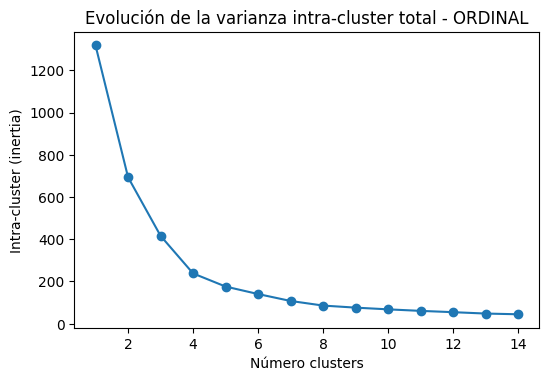

In [32]:
# Método elbow para identificar el número óptimo de clusters
# CODIFICACIÓN ORDINAL
# ==============================================================================
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 100472007
    )
    modelo_kmeans.fit(X_trans_ordinal)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total - ORDINAL")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')
plt.show()

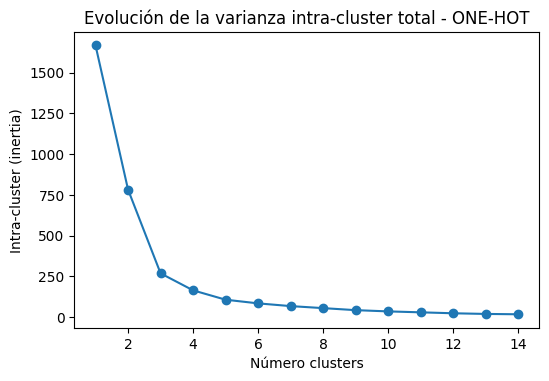

In [4]:
# Método elbow para identificar el número óptimo de clusters
# CODIFICACIÓN ONE-HOT-ENCODING
# ==============================================================================
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 100472007
    )
    modelo_kmeans.fit(X_trans_one_hot_en)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total - ONE-HOT")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')
plt.show()

#### <span style="color:#80DAEB">Método Silhouette</span>

Algunas veces, con el método *Elbow* es difícil determinar en número óptimo de clusters. Otra aproximación es el método *Silhouette*. Utiliza la distancia media intraclúster y la distancia media clúster más cercano para cada muestra. Cuanto mayor sea el valor de la puntuación, mejor será la estimación. Normalmente, las puntuaciones de silhoutte suben y luego bajan hasta alcanzar un número óptimo de clusters. Los valores se sitúan entre -1,0 y 1,0.

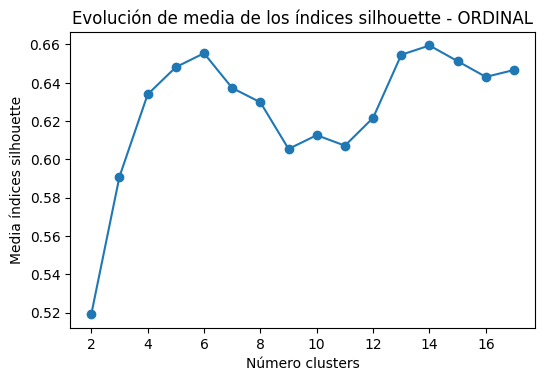

In [38]:
# Método silhouette para identificar el número óptimo de clusters
# CODIFICACIÓN ORDINAL
# ==============================================================================
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 18)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 100472007
    )
    cluster_labels = modelo_kmeans.fit_predict(X_trans_ordinal)
    silhouette_avg = silhouette_score(X_trans_ordinal, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette - ORDINAL")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()

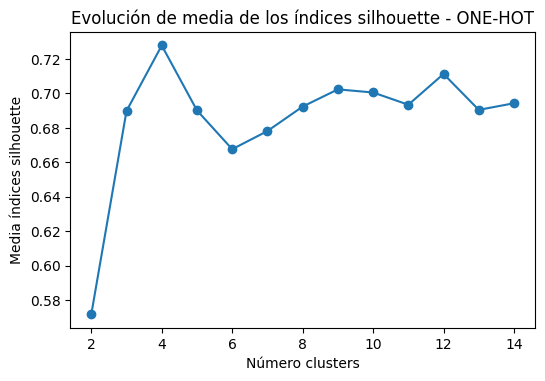

In [5]:
# Método silhouette para identificar el número óptimo de clusters
# CODIFICACIÓN ONE-HOT-ENCODING
# ==============================================================================
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 100472007
    )
    cluster_labels = modelo_kmeans.fit_predict(X_trans_one_hot_en)
    silhouette_avg = silhouette_score(X_trans_one_hot_en, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette - ONE-HOT")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()

#### <span style="color:#80DAEB">Conclusión: Número de clusters</span>


##### Codificación Ordinal:
- El índice de Silhouette sugiere que el número óptimo de clusters es 6. A pesar de que se observe que el Silhouette es más alto para 14 clusters, hemos determinado que no merece la pena usar 14 clusters debido al bajísimo aumento que hay en el índice Silhoutte con respecto a 6 clusters.
- La codificación ordinal preserva el orden natural de las categorías, lo cual es significativo en el contexto, dado que tanto `Color` como `Spectral_Class` tienen una relación ordenada con la energía de las estrellas.
- Como la relación ordinal refleja diferencias físicas importantes, los clusters encontrados con codificación ordinal pueden tener más relevancia interpretativa o científica.
- El escalado de las variables codificadas ordinalmente junto con las numéricas puede haber permitido que las distancias reflejen más fielmente las diferencias de energía.

##### One-Hot Encoding:
- El índice de silueta sugiere que el número óptimo de clusters es 4.
- El one-hot encoding trata cada categoría como independiente, sin asumir un orden, y puede capturar diferencias sutiles en los patrones de datos que la codificación ordinal podría no revelar.
- La dispersión de las categorías en nuevas dimensiones puede permitir que otros patrones en los datos se hagan más evidentes, aunque esto puede no estar directamente relacionado con la energía de las estrellas.
- Menor varianza explicada por PCA en este caso, lo que podría significar que se requieren más componentes para capturar completamente la estructura de los datos.

##### Conclusión:
Dada la importancia física del orden en las variables categóricas y la mayor varianza explicada por PCA con codificación ordinal, parece que la codificación ordinal es más adecuada para el conjunto de datos. Los clusters derivados de esta codificación pueden ofrecer interpretaciones más significativas y alineadas con el conocimiento del dominio. El número de clusters identificado con codificación ordinal es entonces el elegido: <span style="color:#EA899A">**6**</span>.

## <span style="color:#80DAEB">PCA: Caracterización</span>

Ahora, nuestro interés es caracterizar estos seis grupos que nos han salido usando alguna estadísticas descriptiva.

#### <span style="color:#80DAEB">K-Means y DBSCAN - Codificación ordinal</span>

Vamos a ver el resultado con un número de clusters de 6 y los métodos KMeans y DBSCAN.

Número de clusters encontrados DBSCAN: 6
Número de outliers encontrados DBSCAN: 31
Tamaño de cada cluster K-Means: [38, 94, 64, 25, 11, 8]
Tamaño de cada cluster DBSCAN: [80, 70, 25, 9, 21, 4]


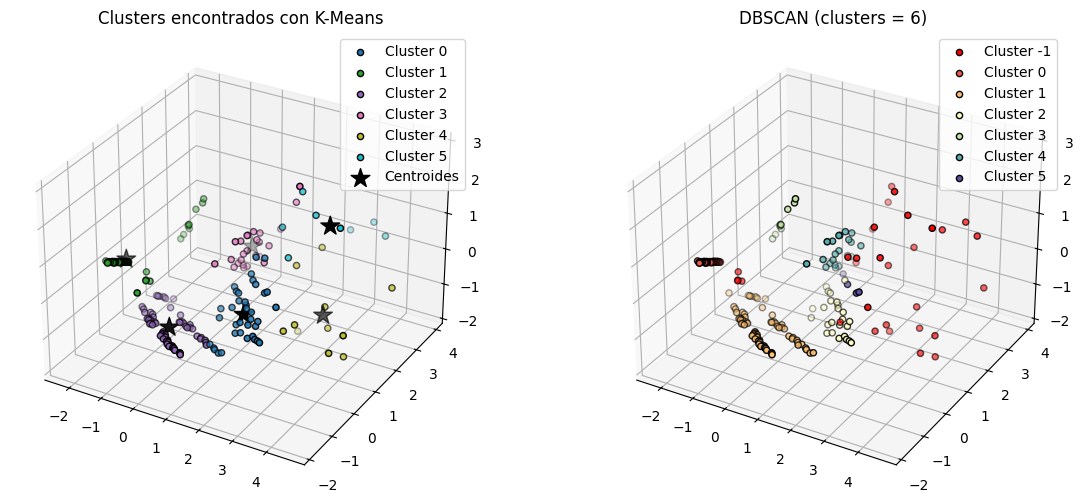

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

fig = plt.figure(figsize=(14, 6))

# Clustering Kmeans en un gráfico 3D
ax = fig.add_subplot(121, projection='3d')
kmeans_model = KMeans(n_clusters=6, n_init=25, random_state=100472007)
y_predict_Kmeans = kmeans_model.fit_predict(X_trans_ordinal)
centroids = kmeans_model.cluster_centers_

# Colores distintos para cada cluster
colors = plt.get_cmap("tab10", len(np.unique(y_predict_Kmeans)))

for i in np.unique(y_predict_Kmeans):
    ax.scatter(
        X_trans_ordinal[y_predict_Kmeans == i, 0],
        X_trans_ordinal[y_predict_Kmeans == i, 1],
        X_trans_ordinal[y_predict_Kmeans == i, 2],
        c=[colors(i)],
        marker='o',
        edgecolor='black',
        label=f"Cluster {i}"
    )

# Centroides de K-Means
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='black', marker='*', label='Centroides')

ax.set_title('Clusters encontrados con K-Means')
ax.legend()

# Clustering DBSCAN en un gráfico 3D
ax = fig.add_subplot(122, projection='3d')
modelo_dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
modelo_dbscan.fit(X_trans_ordinal)
labels = modelo_dbscan.labels_

# Colores para DBSCAN, incluyendo rojo para outliers
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [1, 0, 0]  # Rojo para outliers
    class_member_mask = (labels == k)

    xyz = X_trans_ordinal[class_member_mask]
    ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=[col], marker='o', edgecolor='black', label=f'Cluster {k}')

ax.set_title(f'DBSCAN (clusters = {len(set(labels)) - (1 if -1 in labels else 0)})')
ax.legend()

# Número de clusters y observaciones "outliers" - DBSCAN
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Número de clusters encontrados DBSCAN: {n_clusters}')
print(f'Número de outliers encontrados DBSCAN: {n_noise}')

# Imprimir estadísticas adicionales
print(f'Tamaño de cada cluster K-Means: {[np.sum(y_predict_Kmeans == i) for i in range(6)]}')
print(f'Tamaño de cada cluster DBSCAN: {[(labels == k).sum() for k in range(n_clusters)] if n_clusters > 0 else []}')

plt.show()


Con el ajuste del parámetro `eps` a 0.5 en DBSCAN, se han obtenido resultados más estables y comparables con el método K-Means. Vamos a analizar y comparar ambos métodos de clustering:

### Comparación Visual
1. **K-Means**:
   - Los clusters generados por K-Means muestran una distribución espacial clara y distintiva. Los centroides están bien definidos y posicionados estratégicamente en el centro de cada cluster, lo que indica una buena separación entre ellos.
   - Los clusters varían significativamente en tamaño, reflejando una posible variabilidad en la densidad o distribución de los datos.

2. **DBSCAN**:
   - La visualización de DBSCAN muestra una distribución más irregular de los clusters, aunque ahora con un `eps` más grande, los clusters son menos fragmentados y más significativos en tamaño.
   - Aunque hay menos outliers que en la configuración anterior (31 en comparación a 42 con `eps=0.4`), la cantidad de outliers sigue siendo considerable, destacando la capacidad de DBSCAN para manejar el ruido y detectar anomalías.

### Distribución de Tamaños de Cluster
- **K-Means** sigue mostrando una distribución más desigual en el tamaño de los clusters, que varía desde tan solo 8 hasta 94 puntos.
- **DBSCAN**, ha formado clusters más cohesivos y mejor definidos que en nuestro primer intento (con `eps=0.4`). Los tamaños de los clusters son [80, 70, 25, 9, 21, 4], lo que muestra una mejor distribución de tamaños que antes, aunque algunos clusters aún son bastante pequeños.


### Conclusiones
- Mientras que K-Means proporciona una segmentación clara y equitativa del espacio de características, DBSCAN ofrece una visión de los clusters que no necesariamente se ajustan a patrones esféricos y proporciona información adicional sobre los puntos de datos que no se ajustan a ninguna agrupación densa.
- La presencia de outliers en DBSCAN puede ser una ventaja si estás buscando identificar y posiblemente excluir anomalías o ruido en los datos.
- K-Means podría ser preferido cuando hay expectativas de uniformidad y simetría en los datos, mientras que DBSCAN podría ser más adecuado para detectar agrupaciones naturales y anomalías en datos más complejos y variados.


#### <span style="color:#80DAEB">Boxplots</span>

Vamos a ver los boxplots generados para K-Means y para DBSCAN.

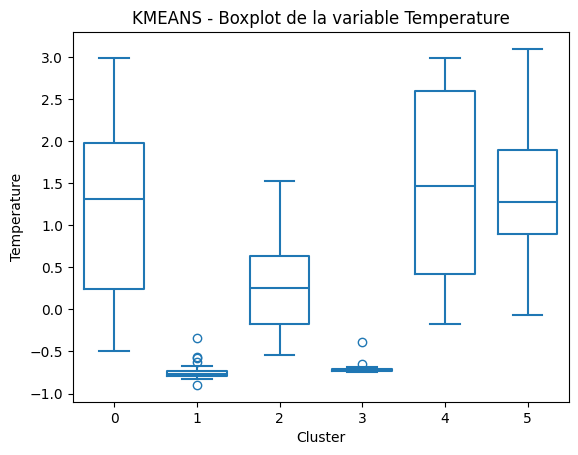

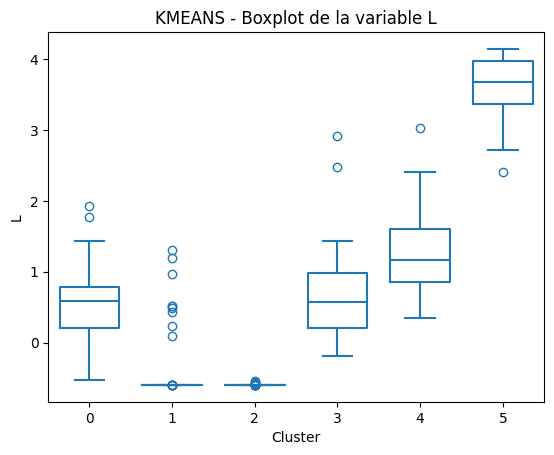

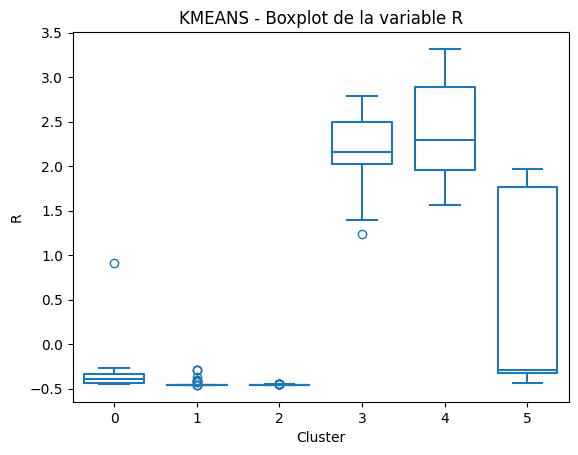

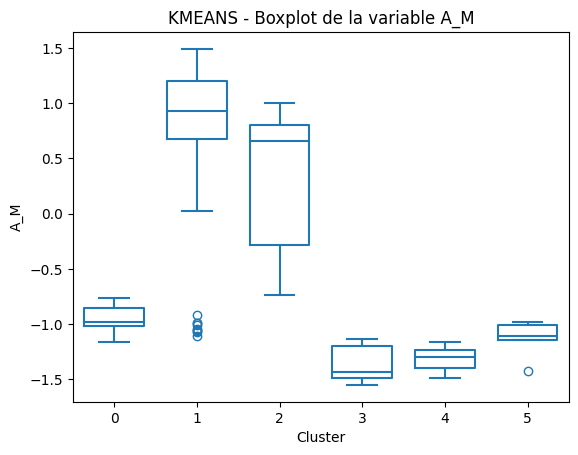

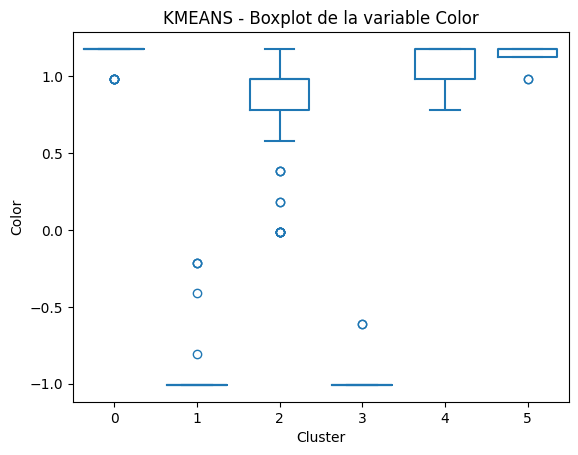

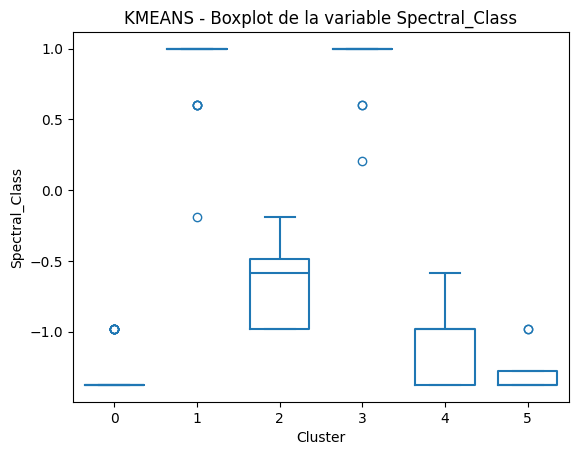

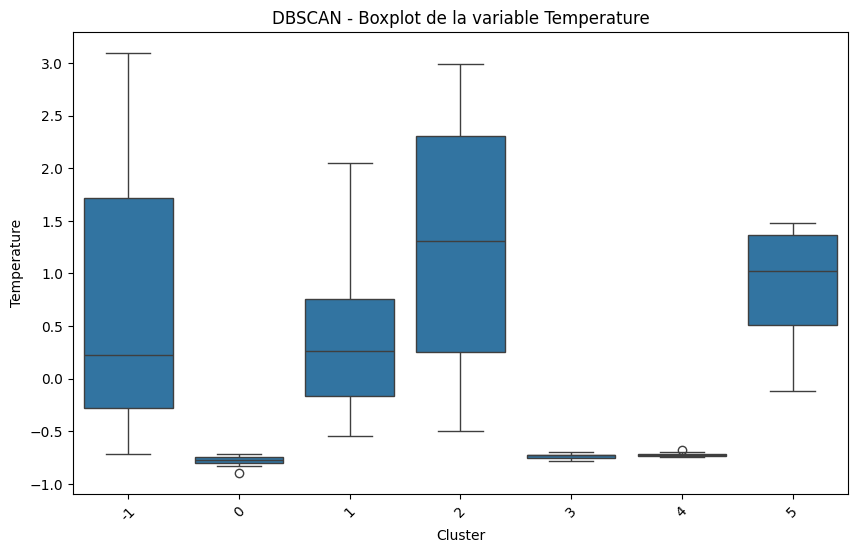

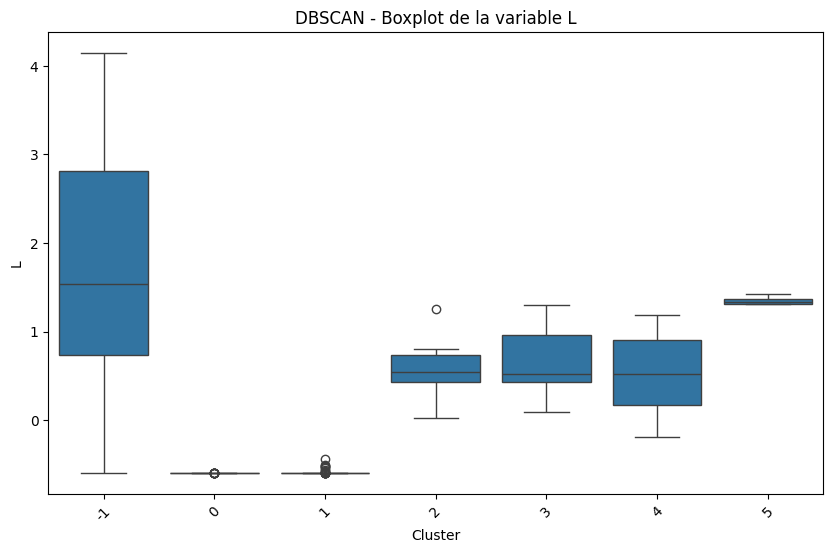

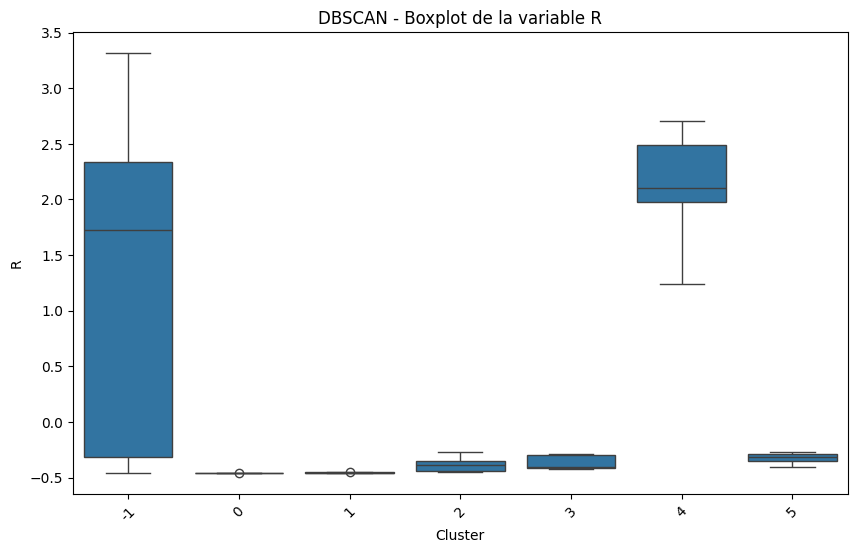

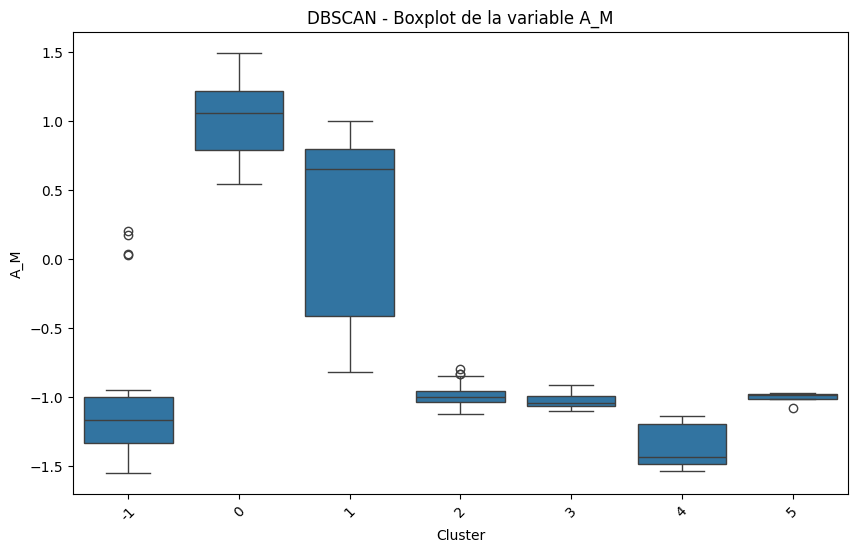

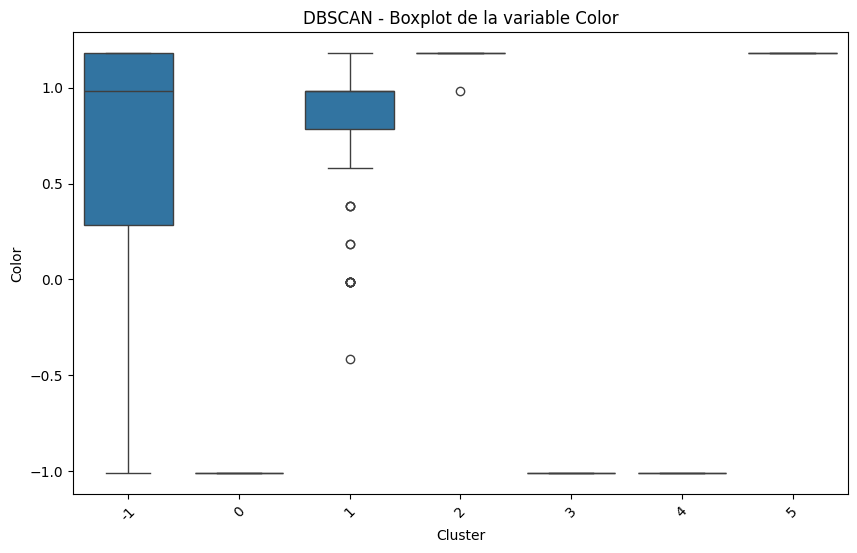

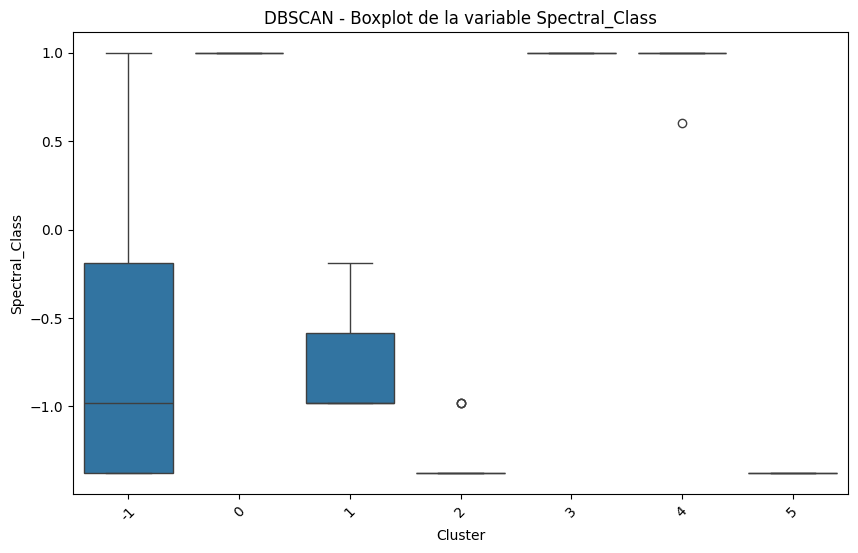

In [12]:
# K-Means

datos1 = df_full_ordinal.copy()
datos1["Cluster"]=y_predict_Kmeans

aux=datos1.columns.tolist()
aux[0:len(aux)-1]

for col in aux[0:len(aux)-1]:
    sns.boxplot(data=datos1, x="Cluster", y=col, fill=False, gap=.1)
    plt.title(f"KMEANS - Boxplot de la variable {col}")
    plt.show()

# DBSCAN

datos2 = df_full_ordinal.copy()
datos2['Cluster'] = labels

# Ahora, vamos a crear un boxplot para cada característica.
columnas = datos2.columns[:-1]  # Todas las columnas excepto la última, que es 'Cluster'.

for col in columnas:
    plt.figure(figsize=(10, 6))  # Configuramos el tamaño del gráfico.
    sns.boxplot(data=datos2, x='Cluster', y=col)
    plt.title(f"DBSCAN - Boxplot de la variable {col}")
    plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario.
    plt.show()


### Conclusión Basada en los Boxplots de K-Means:

**1. Temperatura:**
   - Los clusters muestran una variedad de rangos de temperatura. Es probable que los clusters con temperaturas más altas correspondan a estrellas como enanas blancas o estrellas en secuencia principal, mientras que los clusters con temperaturas más bajas podrían representar enanas rojas o marrones.

**2. Luminosidad (L):**
   - Se ve una amplia variación en la luminosidad entre los clusters. Los clusters con alta luminosidad pueden estar capturando estrellas supergigantes e hipergigantes, que son extremadamente brillantes. Los clusters con baja luminosidad podrían estar relacionados con estrellas más pequeñas y menos luminosas.

**3. Radio (R):**
   - Similar a la luminosidad, algunos clusters presentan un radio mayor, posiblemente correspondiente a supergigantes e hipergigantes debido a su tamaño masivo. Los clusters con radios menores podrían representar estrellas más pequeñas como enanas blancas.

**4. Magnitud Absoluta (A_M):**
   - La magnitud absoluta tiende a ser más baja (más brillante) para las estrellas supergigantes e hipergigantes, lo que parece ser capturado en algunos clusters, mientras que los valores más altos (menos brillantes) podrían indicar estrellas de menor tamaño y menor brillo intrínseco.

**5. Color:**
   - Los boxplots muestran diferentes colores predominantes por cluster, lo que podría indicar agrupaciones basadas en la temperatura superficial y el tipo de estrella, ya que el color está correlacionado con estas características.

**6. Clase Espectral:**
   - Los clusters pueden mostrar una tendencia de clases espectrales particulares agrupadas juntas, que están asociadas con ciertas temperaturas y tipos de estrellas. Esto es consistente con la expectativa de que estrellas similares en términos de sus propiedades espectrales se agruparían juntas.

**7. Interpretación del Modelo y Razón de los 6 Clusters:**

   - Los 6 clusters identificados por K-Means podrían estar relacionados con las categorías de estrellas mencionadas en el enunciado: enanas rojas, enanas marrones, enanas blancas, estrellas en secuencia principal, supergigantes e hipergigantes. El algoritmo de K-Means podría estar capturando estas categorías distintas basándose en las diferencias en sus propiedades físicas y astronómicas, que se reflejan en las variables del conjunto de datos.
   - El algoritmo K-Means tiende a encontrar grupos de variabilidad similar, y en este contexto, parece que ha identificado grupos que coinciden con clasificaciones conocidas en astronomía, donde cada una de estas clasificaciones tiene características distintivas en términos de temperatura, luminosidad, radio y magnitud absoluta.


### Conclusión Basada en los Boxplots de DBSCAN:

1. **Temperatura**:
   - En DBSCAN, la distribución de la temperatura a lo largo de los clusters parece ser más variable en comparación con K-Means. Esto sugiere que DBSCAN podría estar identificando clusters más heterogéneos en términos de temperatura, o bien, que está siendo más inclusivo al agrupar estrellas de diferentes temperaturas en un mismo cluster.
   - K-Means muestra una distinción más clara entre clusters basados en temperatura, lo que podría indicar una segmentación más definida de tipos de estrellas según su temperatura superficial.

2. **Luminosidad (L)**:
   - Similar a la temperatura, DBSCAN presenta una variabilidad más amplia dentro de algunos clusters y no muestra la misma consistencia que K-Means, lo que puede ser indicativo de su sensibilidad a la densidad en lugar de a la distancia pura.
   - K-Means parece agrupar las estrellas con luminosidades similares de manera más consistente, lo que puede ser más interpretable en términos de tipos de estrellas específicas.

3. **Radio (R)**:
   - DBSCAN tiene una distribución más dispersa del radio en algunos clusters, y nuevamente parece menos consistente que K-Means. Puede estar capturando variaciones dentro de tipos de estrellas que son menos homogéneos en tamaño.
   - K-Means muestra clusters con una separación más clara según el radio, lo que puede alinearse con clasificaciones estelares basadas en el tamaño.

4. **Magnitud Absoluta (A_M)**:
   - Los clusters de DBSCAN reflejan una mayor heterogeneidad en magnitud absoluta comparados con los de K-Means, que presenta clusters con rangos más definidos de magnitud, lo que podría sugerir agrupaciones más claras según el brillo intrínseco de las estrellas.

5. **Color**:
   - Los clusters de DBSCAN no muestran patrones claros para el color, y parece haber una mezcla de estrellas de diferentes colores en cada cluster.
   - K-Means parece tener una distribución de color más segmentada, lo que puede ser útil si el color está fuertemente correlacionado con otras propiedades estelares importantes.

6. **Clase Espectral**:
   - Los boxplots de DBSCAN muestran una amplia variabilidad en la clase espectral dentro de los clusters, lo que podría indicar que la agrupación se basa menos en esta característica o que las clases espectrales están más entremezcladas.
   - En contraste, K-Means muestra clusters más diferenciados en términos de clase espectral, lo que podría sugerir una mejor alineación con las clasificaciones espectral estelar conocidas.

### Conclusión General:

Los boxplots de DBSCAN sugieren que este algoritmo de clustering puede estar capturando una diversidad más amplia de estrellas dentro de cada cluster, lo cual es consistente con su enfoque en la identificación de clusters basados en la densidad de puntos. Esto podría ser beneficioso si se busca entender las variaciones dentro de los tipos de estrellas y se desea incluir una mayor heterogeneidad.

En comparación, los resultados de K-Means parecen reflejar una segmentación más clara y distinta de los datos, lo que podría ser preferible para aplicaciones donde se necesiten agrupaciones definidas y homogéneas de estrellas, como en la clasificación automática o en estudios donde las categorías de estrellas estén bien definidas y se quiera que los clusters reflejen estas categorías.

Como se busca una clasificación clara y distintiva que se alinee con las categorías estelares tradicionales, <span style="color:#EA899A">K-Means es el método más adecuado</span>.

## <span style="color:#80DAEB">COMPARACIÓN CON ONE-HOT-ENCODING</span>

<span style="color:#009C8C">"4. Discutir los resultados que se obtienen si a los atributos categóricos se les aplica one-hot-encoding o se asigna un valor numérico a las secuencias (variable ordinal)."</span>

Para poder comaprar completamente las dos codificaciones, vamos a realizar K-Means también con los datos codificados con One-hot-encoding.

#### <span style="color:#80DAEB">K-Means - One-hot-encoding</span>

Vamos a ver el resultado con un número de clusters de 4, que es lo que indicaba el Silhouette.

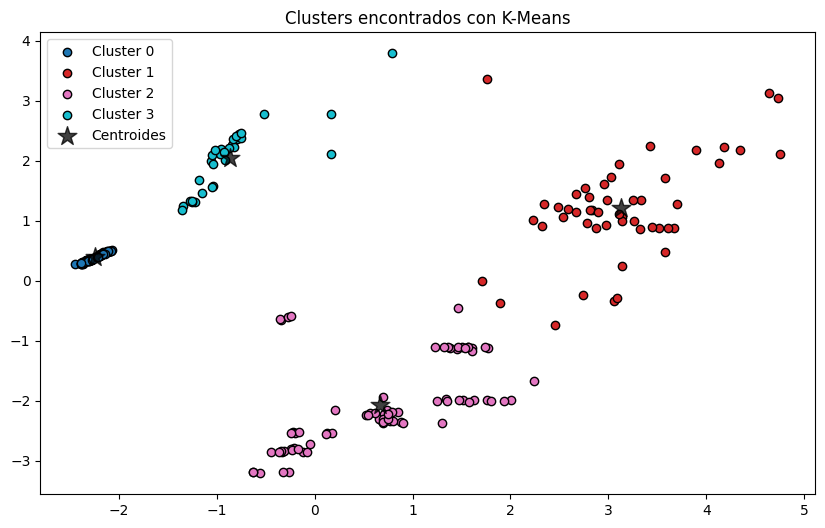

Número de puntos por cluster: {0: 80, 1: 50, 2: 77, 3: 33}


In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Clustering K-Means
kmeans = KMeans(n_clusters=4, n_init=25, random_state=100472007)
y_predict_Kmeans_one_hot_en = kmeans.fit_predict(X=X_trans_one_hot_en)
centroids = kmeans.cluster_centers_

# Colores para cada cluster
colors = plt.get_cmap("tab10", len(np.unique(y_predict_Kmeans_one_hot_en)))

# Visualización de los clusters y centroides
for i in np.unique(y_predict_Kmeans_one_hot_en):
    ax.scatter(
        X_trans_one_hot_en[y_predict_Kmeans_one_hot_en == i, 0],
        X_trans_one_hot_en[y_predict_Kmeans_one_hot_en == i, 1],
        c=[colors(i)],
        marker='o',
        edgecolor='black',
        label=f"Cluster {i}"
    )

# Centroides
ax.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='black', 
    s=200, 
    alpha=0.75,
    marker='*', 
    label='Centroides'
)

ax.set_title('Clusters encontrados con K-Means')
ax.legend()

plt.show()

# Cálculo del número de puntos por cluster
cluster_sizes = {i: sum(y_predict_Kmeans_one_hot_en == i) for i in np.unique(y_predict_Kmeans_one_hot_en)}
print("Número de puntos por cluster:", cluster_sizes)



#### <span style="color:#80DAEB">Boxplots</span>

Vamos a ver los boxplots generados para K-Means.

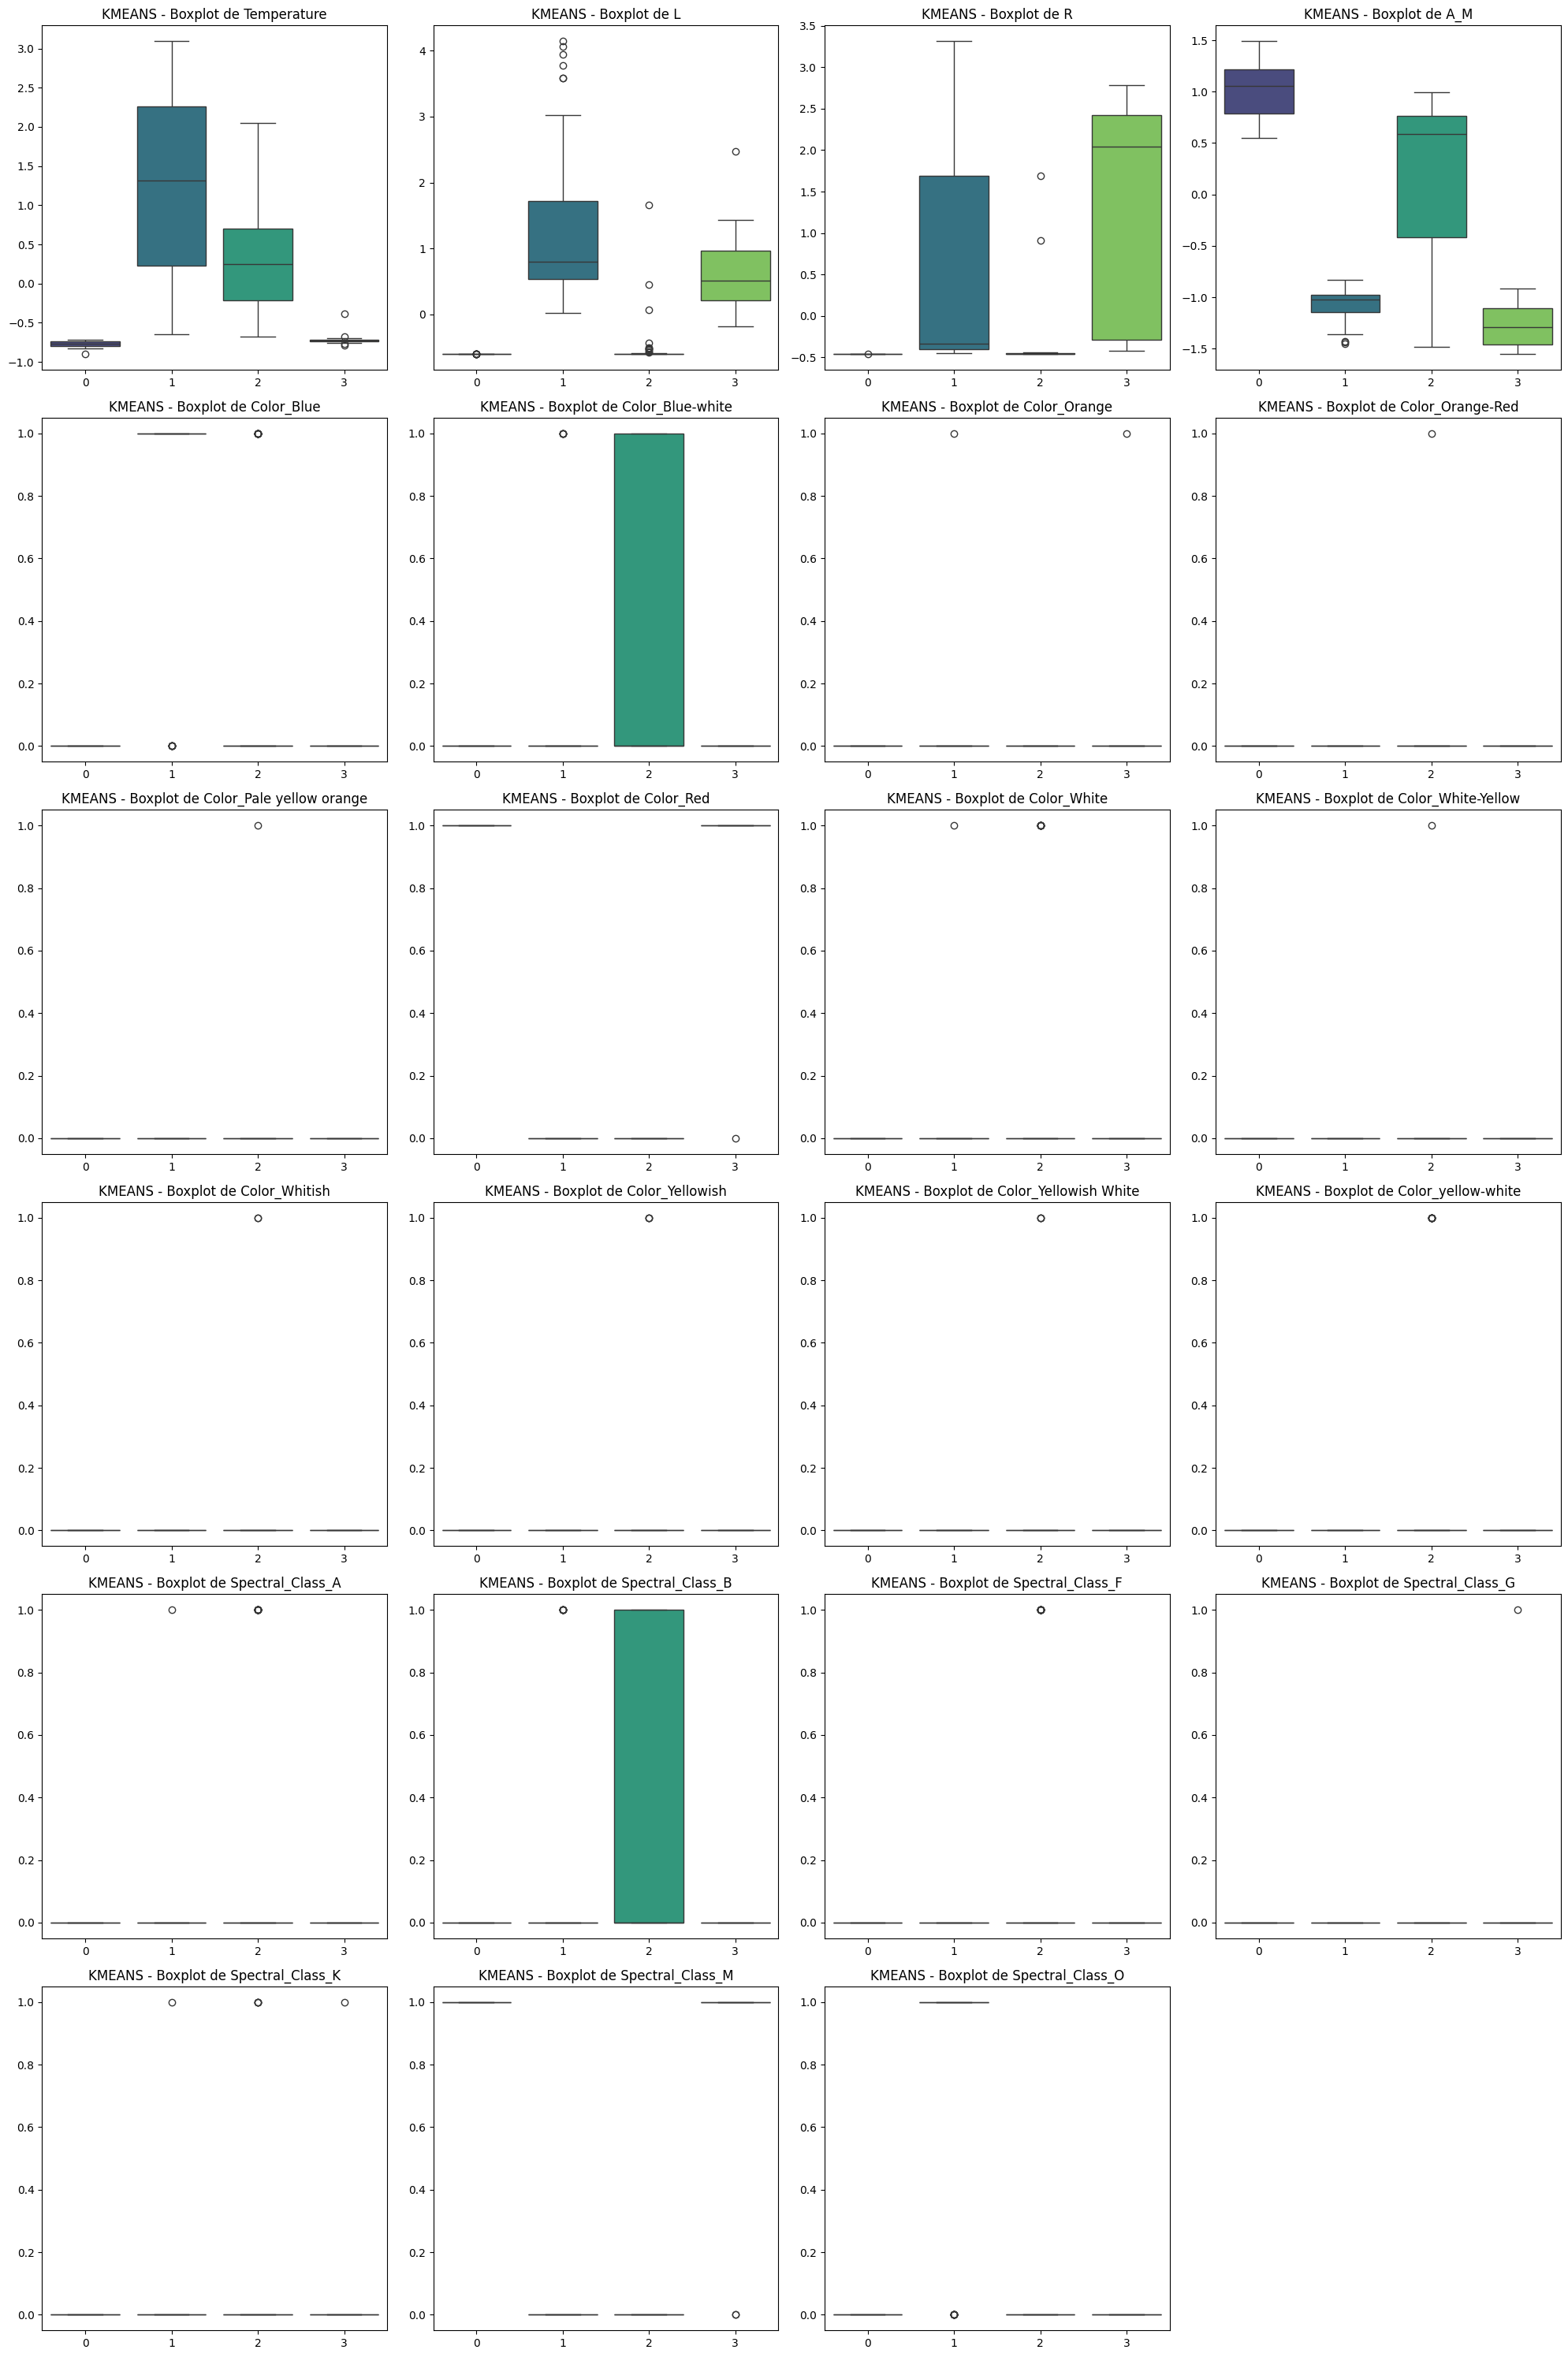

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Seleccionar solo las columnas de variables codificadas
variables_codificadas = df_one_hot_en.columns.tolist()

# Crear un nuevo dataframe con las variables codificadas y la columna de clusters
datos1 = df_one_hot_en[variables_codificadas].copy()
datos1["Cluster"] = y_predict_Kmeans_one_hot_en

# Número de variables codificadas
n_vars_codificadas = len(variables_codificadas)

# Número de filas necesarias basado en la cantidad de gráficos (redondeo hacia arriba)
n_rows = n_vars_codificadas // 4 + (n_vars_codificadas % 4 > 0)

# Crear los subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Aplanamos el array de ejes para iterar fácilmente

# Iterar sobre las columnas de variables codificadas y crear los boxplots
for i, col in enumerate(variables_codificadas):
    sns.boxplot(data=datos1, x="Cluster", y=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f"KMEANS - Boxplot de {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ocultar los ejes que no se utilizan
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#### <span style="color:#80DAEB">Codificación ordinal VS One-hot-encoding</span>


<span style="color:#9B9B9B">RESUMEN RESULTADOS OBTENIDOS:</span>

<span style="color:#9B9B9B">**Codificación Ordinal:**</span>

<span style="color:#9B9B9B">        PC1       PC2       PC3</span>

<span style="color:#9B9B9B">0 -2.067808 -0.147152  0.190962</span>

<span style="color:#9B9B9B">1 -2.087328 -0.165090  0.195077</span>

<span style="color:#9B9B9B">2 -2.188924 -0.236104  0.217676</span>

<span style="color:#9B9B9B">3 -2.101169 -0.161525  0.198859</span>

<span style="color:#9B9B9B">4 -2.273203 -0.273557  0.237536</span>

<span style="color:#9B9B9B">Proporción de varianza explicada: [0.55409866 0.29691252 0.06395951]</span>

<span style="color:#9B9B9B">Proporción acumulada: [0.55409866 0.85101118 0.91497069]</span>

<span style="color:#9B9B9B">Índice silueta: número de clusters óptimo = 6</span>

<span style="color:#9B9B9B">Tamaño de cada cluster K-Means: [38, 94, 64, 25, 11, 8]</span>

<span style="color:#9B9B9B">Box-plots: los 6 obtenidos arriba.</span>


<span style="color:#9B9B9B">**One-hot-encoding:**</span>

<span style="color:#9B9B9B">Proporción de varianza explicada: [0.18611084 0.1158609 ]</span>

<span style="color:#9B9B9B">Proporción acumulada: [0.18611084 0.30197174]</span>

<span style="color:#9B9B9B">Índice silueta: número óptimo de clusters = 4</span>

<span style="color:#9B9B9B">Número de puntos por cluster: {0: 80, 1: 50, 2: 77, 3: 33}</span>

<span style="color:#9B9B9B">Box-plots: la imagen del apartado anterior.</span>


### Comparación de Resultados

1. **Proporción de Varianza Explicada**:
   - **Ordinal**: La varianza explicada por los tres primeros componentes principales suma un 91.5%. Esto indica una retención eficiente de la información relevante en un espacio de menor dimensionalidad.
   - **One-hot encoding**: La varianza explicada suma solo un 30.2% en los dos primeros componentes, lo que sugiere que la gran cantidad de dimensiones generadas por one-hot encoding diluye la información crítica de los datos.

2. **Calidad del Clustering**:
   - **Ordinal**: La silueta muestra que el número óptimo de clusters es 6, coincidiendo con la categorización astronómica de las estrellas, lo que sugiere que la asignación ordinal preserva la estructura natural y las relaciones inherentes entre los datos.
   - **One-hot encoding**: El índice de silueta sugiere un número óptimo de 4 clusters, que es menos que el número esperado basado en la clasificación científica de las estrellas. Esto podría indicar una agrupación menos precisa y un reconocimiento inadecuado de las subcategorías naturales.

3. **Interpretación de los Clusters**:
   - **Ordinal**: La distribución y los tamaños de los clusters se alinean bien con las expectativas astronómicas y permiten una interpretación clara, donde cada cluster representa distintivamente un tipo de estrella.
   - **One-hot encoding**: La variabilidad y distribución de los tamaños de los clusters pueden llevar a interpretaciones ambiguas y menos definidas, complicando la identificación precisa de tipos específicos de estrellas.

### Conclusión: Ventajas del Enfoque Ordinal

En el contexto de nuestro estudio sobre estrellas, la codificación ordinal es claramente superior debido a:
- **Conservación de la Estructura de Datos**: Mantiene la secuencia natural de las categorías, crucial para datos astronómicos donde el orden tiene significado científico (por ejemplo, la secuencia de las clases espectrales).
- **Eficiencia en la Reducción de Dimensiones**: Al reducir la complejidad sin perder información significativa, facilita un análisis más eficiente y una interpretación más sencilla.
- **Mejor Correspondencia con Clasificaciones Científicas**: Los clusters formados corresponden de manera más precisa y significativa con las categorizaciones reales utilizadas en astronomía, permitiendo un análisis que respeta y refleja las diferencias físicas y teóricas entre los tipos de estrellas.

Estos puntos subrayan por qué, en este caso específico, la codificación ordinal no solo es adecuada sino recomendable para un análisis detallado y científicamente coherente de datos astronómicos.

## <span style="color:#80DAEB">CONCLUSIÓN GLOBAL</span>

<span style="color:#009C8C">"5. A partir de los resultados obtenidos, ¿qué pipeline de clustering, es decir, qué transformaciones de datos, algoritmo, con sus hiperparámetros, transformación de datos y análisis de resultados recomendaría realizar?"</span>

Tras observar todos los resultados podemos afirmar que el pipeline de clustering más adecuado es la codificación ordinal, el escalado de los datos y el uso de Kmeans

## <span style="color:#80DAEB">GRUPOS OBTENIDOS VS GRUPOS EN ASTRONOMÍA</span>

<span style="color:#009C8C">"6. ¿Hay similitudes con los grupos obtenidos en el punto 4? Explicar"</span>

BLA BLA